In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
df = pd.read_csv('dataset.csv')

In [11]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
print("\n" + "="*60)
print("DATA INFO")
print("="*60)
print(df.info())


DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 1

In [16]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [17]:
df.corr()['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [19]:
X = df.drop('price_range', axis=1)
y = df['price_range']


print(f"Features shape: {X.shape}")  
print(f"Target shape: {y.shape}")  

Features shape: (2000, 20)
Target shape: (2000,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # Same split every time
    stratify=y          # Keep same proportion of each class
)

In [22]:
print(f"\nTraining set: {X_train.shape[0]} phones ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test set: {X_test.shape[0]} phones ({X_test.shape[0]/len(X)*100:.0f}%)")


Training set: 1600 phones (80%)
Test set: 400 phones (20%)


In [23]:
print("\n" + "="*60)
print("DECISION TREE MODEL")
print("="*60)


DECISION TREE MODEL


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [25]:
dt_model = DecisionTreeClassifier(
    max_depth=10,           # Limit depth to prevent overfitting
    min_samples_split=20,   # Need 20 samples to split
    random_state=42
)

In [26]:
print("Training Decision Tree...")
dt_model.fit(X_train, y_train)
print("✅ Training complete!")


Training Decision Tree...
✅ Training complete!


In [27]:
y_pred_dt = dt_model.predict(X_test)

In [28]:
# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Accuracy: {dt_accuracy*100:.2f}%")



Decision Tree Accuracy: 85.25%


In [29]:
# Detailed report
print("\n" + "="*60)
print("CLASSIFICATION REPORT - DECISION TREE")
print("="*60)
class_names = ['Low', 'Medium', 'High', 'Very High']
print(classification_report(y_test, y_pred_dt, target_names=class_names))


CLASSIFICATION REPORT - DECISION TREE
              precision    recall  f1-score   support

         Low       0.89      0.92      0.91       100
      Medium       0.81      0.79      0.80       100
        High       0.78      0.83      0.81       100
   Very High       0.94      0.87      0.90       100

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [30]:
correct_dt = (y_pred_dt == y_test).sum()
print(f"\nCorrect predictions: {correct_dt}/{len(y_test)}")


Correct predictions: 341/400



Plotting Decision Tree confusion matrix...


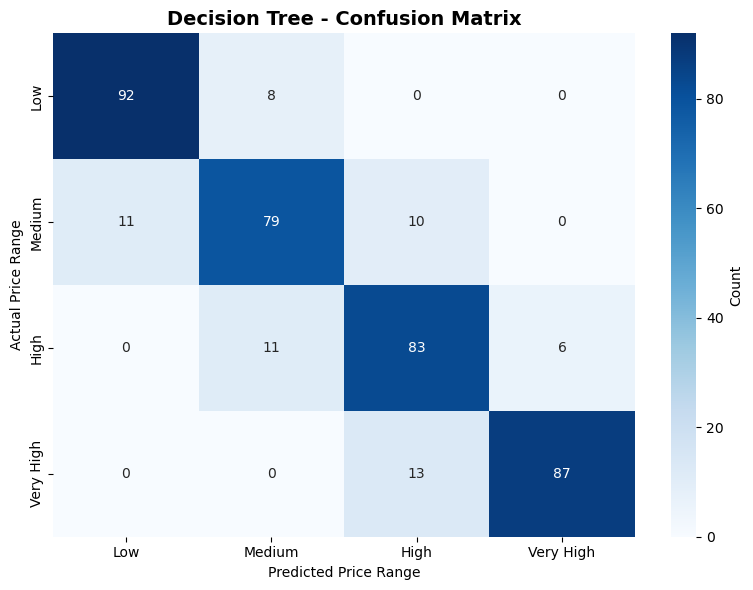

In [32]:
# Confusion Matrix
print("\nPlotting Decision Tree confusion matrix...")
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Decision Tree - Confusion Matrix', fontsize=14, weight='bold')
plt.ylabel('Actual Price Range')
plt.xlabel('Predicted Price Range')
plt.tight_layout()
plt.show()

In [33]:
# Feature Importance
print("\n" + "="*60)
print("FEATURE IMPORTANCE - DECISION TREE")
print("="*60)

feature_importance_dt = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_dt.head(10))



FEATURE IMPORTANCE - DECISION TREE

Top 10 Most Important Features:
          feature  importance
13            ram    0.669858
0   battery_power    0.120525
12       px_width    0.088476
11      px_height    0.076886
8       mobile_wt    0.013887
16      talk_time    0.007909
6      int_memory    0.005978
7           m_dep    0.003548
4              fc    0.003407
15           sc_w    0.002921


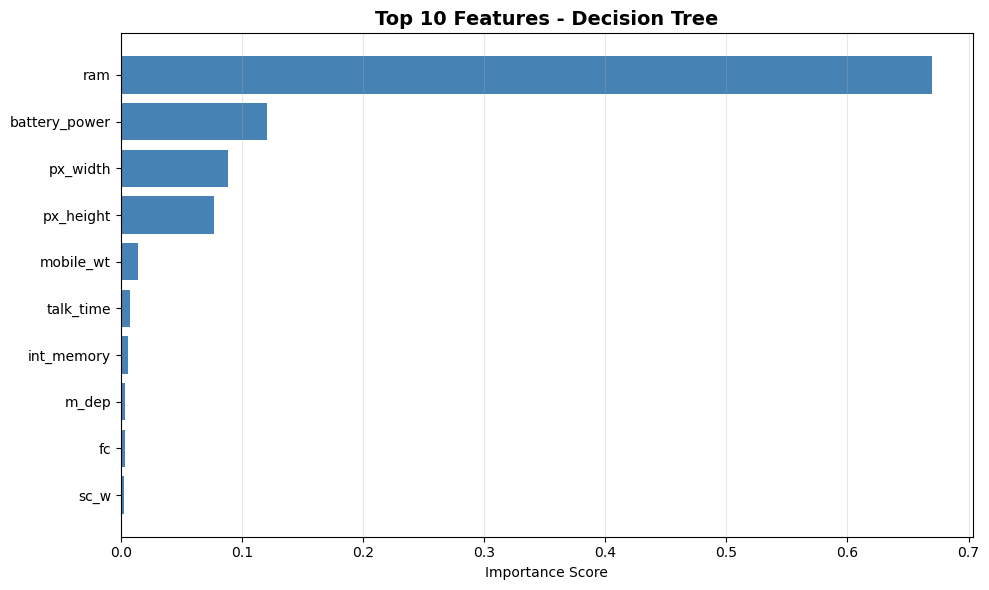

In [34]:
# Plot
plt.figure(figsize=(10, 6))
top_10_dt = feature_importance_dt.head(10)
plt.barh(top_10_dt['feature'], top_10_dt['importance'], color='steelblue')
plt.xlabel('Importance Score')
plt.title('Top 10 Features - Decision Tree', fontsize=14, weight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [35]:
# Create model
rf_model = RandomForestClassifier(
    n_estimators=100,       # Build 100 trees
    max_depth=15,           # Each tree can be deeper
    min_samples_split=10,   
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)

In [36]:
print("Training Random Forest (100 trees)...")
print("This will take 10-30 seconds...")
rf_model.fit(X_train, y_train)
print("✅ Training complete!")

Training Random Forest (100 trees)...
This will take 10-30 seconds...
✅ Training complete!


In [37]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {rf_accuracy*100:.2f}%")


Random Forest Accuracy: 88.00%


In [38]:
# Detailed report
print("\n" + "="*60)
print("CLASSIFICATION REPORT - RANDOM FOREST")
print("="*60)
print(classification_report(y_test, y_pred_rf, target_names=class_names))


CLASSIFICATION REPORT - RANDOM FOREST
              precision    recall  f1-score   support

         Low       0.94      0.96      0.95       100
      Medium       0.81      0.82      0.82       100
        High       0.82      0.79      0.81       100
   Very High       0.94      0.95      0.95       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [39]:
# How many correct?
correct_rf = (y_pred_rf == y_test).sum()
print(f"\nCorrect predictions: {correct_rf}/{len(y_test)}")


Correct predictions: 352/400



Plotting Random Forest confusion matrix...


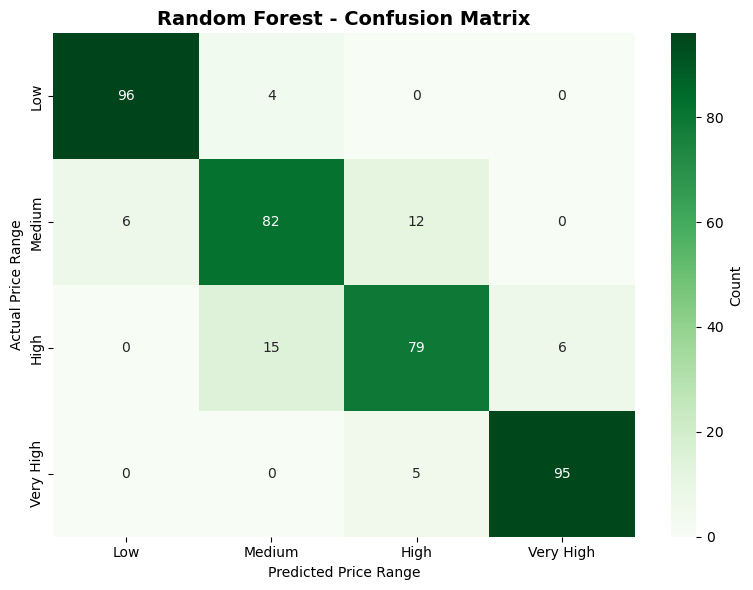

In [40]:
# Confusion Matrix
print("\nPlotting Random Forest confusion matrix...")
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Random Forest - Confusion Matrix', fontsize=14, weight='bold')
plt.ylabel('Actual Price Range')
plt.xlabel('Predicted Price Range')
plt.tight_layout()
plt.show()

In [41]:
# Feature Importance
print("\n" + "="*60)
print("FEATURE IMPORTANCE - RANDOM FOREST")
print("="*60)

feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_rf.head(10))


FEATURE IMPORTANCE - RANDOM FOREST

Top 10 Most Important Features:
          feature  importance
13            ram    0.552550
0   battery_power    0.074008
12       px_width    0.055601
11      px_height    0.051614
8       mobile_wt    0.033430
6      int_memory    0.031225
16      talk_time    0.026599
10             pc    0.025067
2     clock_speed    0.023410
15           sc_w    0.022805


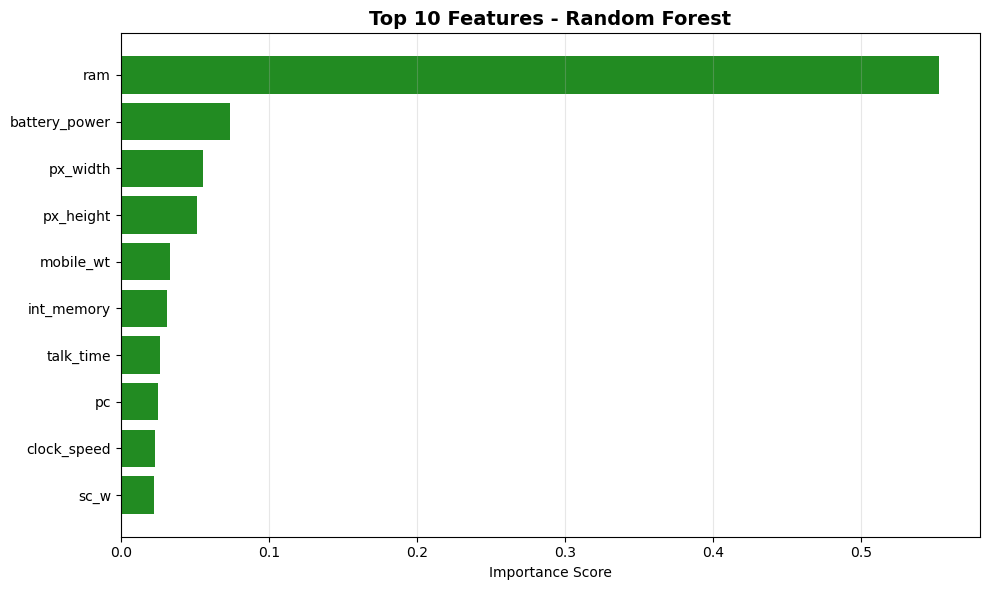

In [42]:
# Plot
plt.figure(figsize=(10, 6))
top_10_rf = feature_importance_rf.head(10)
plt.barh(top_10_rf['feature'], top_10_rf['importance'], color='forestgreen')
plt.xlabel('Importance Score')
plt.title('Top 10 Features - Random Forest', fontsize=14, weight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [44]:
# Create comparison
comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [dt_accuracy*100, rf_accuracy*100],
    'Correct': [correct_dt, correct_rf],
    'Wrong': [len(y_test)-correct_dt, len(y_test)-correct_rf]
})
print(comparison.to_string(index=False))

        Model  Accuracy  Correct  Wrong
Decision Tree     85.25      341     59
Random Forest     88.00      352     48


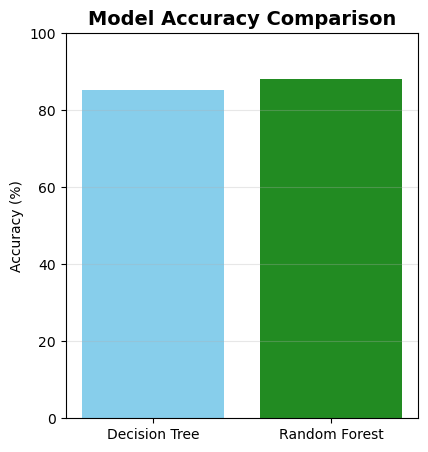

In [45]:
# Plot accuracy comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
bars = plt.bar(comparison['Model'], comparison['Accuracy'], 
               color=['skyblue', 'forestgreen'])
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison', fontsize=14, weight='bold')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

In [48]:
# Determine winner
print("\n" + "="*60)
print("WINNER")
print("="*60)
if rf_accuracy > dt_accuracy:
    improvement = (rf_accuracy - dt_accuracy) * 100
    print(f"🏆 Random Forest is BETTER by {improvement:.2f}%")
    best_model = rf_model
    best_name = "Random Forest"
elif dt_accuracy > rf_accuracy:
    improvement = (dt_accuracy - rf_accuracy) * 100
    print(f"🏆 Decision Tree is BETTER by {improvement:.2f}%")
    best_model = dt_model
    best_name = "Decision Tree"
else:
    print("🤝 Both models have the SAME accuracy!")
    best_model = rf_model  # Choose RF as default
    best_name = "Random Forest"


WINNER
🏆 Random Forest is BETTER by 2.75%
